# Documentation of Tasks

---

1. Reformatted column widths
2. Edited all text size to same size, all font family to calibri, all text align to bottom align
3. Read the raw dataset and campaign lookup tab into Jupyter notebook using Pandas.
4. Checked for and dropped missing values and missing columns in both datasets.
5. Changed data type of the 'Impressions' column of the raw dataset into int64.
6. Extracting week number from date to aggregate the sum and mean values of the columns by week.
7. Focussing on and plotting weekly time-series charts for total weekly costs and impressions.
8. Dropped the Campaign and Daily Information columns to find that the aggregate data produce the same results.
9. Calculating relevant metrics for the entire dataset (sum, mean) at a top-line level.
10. Analyzing additional metrics at the top-line aggregated level and drilling down into a granular level
11. Slicing the data based on other relevant dimensions.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 3. Importing the dataset

In [2]:
# Specify the file path to your Excel workbook
file_path = 'C:\\Users\\Shaikh Rezwan\\PythonTests\\econometrics_data.xlsx'

# Read the raw dataset tab into a dataframe
raw_df = pd.read_excel(file_path, sheet_name='Raw_data')

# Read the campaign lookup tab into a dataframe
campaign_df = pd.read_excel(file_path, sheet_name='Campaign_lookup')

# Print the first few rows of each dataframe to verify the data
print("Raw Dataset:")
print(raw_df.head())
print("\nCampaign Lookup:")
print(campaign_df.head())

Raw Dataset:
        Date                         Campaign   Cost  Impressions
0 2015-02-04                    Branded Broad   8.49       4315.0
1 2015-02-04                Competitors Broad  23.25       5407.0
2 2015-02-04                 X_B | UK | Exact   3.60       2203.0
3 2015-02-04  X_LT | UK | Competitors | Exact   5.30       2328.0
4 2015-02-05                Competitors Broad   4.56       3804.0

Campaign Lookup:
                   Campaign  Channel Brand/Generic         Type  Unnamed: 4
0                [UK] - GDN  Display       Generic  Prospecting         NaN
1              [UK] - Video  Display       Generic  Prospecting         NaN
2  [UK] - Video Remarketing  Display       Generic  Remarketing         NaN
3          GDN: UK - Hybrid  Display       Generic  Prospecting         NaN
4   LT: UK Dis Comp_Context  Display       Generic  Prospecting         NaN


### 4. Checking for missing values in both datasets

In [3]:
print("Raw Dataset:\n", raw_df.isna().sum())
print("\nCampaign Lookup:\n", campaign_df.isna().sum())

Raw Dataset:
 Date            0
Campaign        0
Cost            0
Impressions    27
dtype: int64

Campaign Lookup:
 Campaign            0
Channel             0
Brand/Generic       0
Type                0
Unnamed: 4       1158
dtype: int64


In [4]:
print(raw_df.columns.tolist())
print(campaign_df.columns.tolist())

['Date', 'Campaign', 'Cost', 'Impressions']
['Campaign', 'Channel', 'Brand/Generic', 'Type', 'Unnamed: 4']


##### For the Raw Dataset: The 'Impressions' column has 27 missing values which we will remove for now by dropping the rows, since they are relatively few and do not significantly impact our analysis.

##### For the Campaign Lookup dataset: There is a 'Unnamed: 4' column which has a high percentage of missing values but looks like it is not crucial for our analysis, so we will remove that column.

In [5]:
raw_df_cleaned = raw_df.dropna()
campaign_df_cleaned = campaign_df.drop('Unnamed: 4', axis=1)

In [6]:
print("Raw Dataset:\n", raw_df_cleaned.isna().sum())
print("\nCampaign Lookup:\n", campaign_df_cleaned.isna().sum())

Raw Dataset:
 Date           0
Campaign       0
Cost           0
Impressions    0
dtype: int64

Campaign Lookup:
 Campaign         0
Channel          0
Brand/Generic    0
Type             0
dtype: int64


In [7]:
# Print the cleaned datasets again
print("Raw Cleaned Dataset:")
print(raw_df_cleaned.head())
print("\nCampaign Lookup Cleaned:")
print(campaign_df_cleaned.head())

Raw Cleaned Dataset:
        Date                         Campaign   Cost  Impressions
0 2015-02-04                    Branded Broad   8.49       4315.0
1 2015-02-04                Competitors Broad  23.25       5407.0
2 2015-02-04                 X_B | UK | Exact   3.60       2203.0
3 2015-02-04  X_LT | UK | Competitors | Exact   5.30       2328.0
4 2015-02-05                Competitors Broad   4.56       3804.0

Campaign Lookup Cleaned:
                   Campaign  Channel Brand/Generic         Type
0                [UK] - GDN  Display       Generic  Prospecting
1              [UK] - Video  Display       Generic  Prospecting
2  [UK] - Video Remarketing  Display       Generic  Remarketing
3          GDN: UK - Hybrid  Display       Generic  Prospecting
4   LT: UK Dis Comp_Context  Display       Generic  Prospecting


### 5. Changed data type

In [8]:
# The 'Impressions' column can be turned into an integer

raw_df_cleaned['Impressions'] = raw_df_cleaned['Impressions'].astype('int64')
print(raw_df_cleaned.dtypes)
print('\nRaw Cleaned Dataset:\n',raw_df_cleaned.head())

Date           datetime64[ns]
Campaign               object
Cost                  float64
Impressions             int64
dtype: object

Raw Cleaned Dataset:
         Date                         Campaign   Cost  Impressions
0 2015-02-04                    Branded Broad   8.49         4315
1 2015-02-04                Competitors Broad  23.25         5407
2 2015-02-04                 X_B | UK | Exact   3.60         2203
3 2015-02-04  X_LT | UK | Competitors | Exact   5.30         2328
4 2015-02-05                Competitors Broad   4.56         3804


<ipython-input-8-6aa4a5421863>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_df_cleaned['Impressions'] = raw_df_cleaned['Impressions'].astype('int64')


### 6. Now let us look at the date column of the raw dataset, since we need to aggregate and analyze the data by Week

In [9]:
raw_df_cleaned.dtypes

Date           datetime64[ns]
Campaign               object
Cost                  float64
Impressions             int64
dtype: object

##### Extracting the week number from the date

In [10]:
raw_df_cleaned['WeekNumber'] = raw_df_cleaned['Date'].dt.strftime('%U')
print(raw_df_cleaned)

            Date                                           Campaign    Cost  \
0     2015-02-04                                      Branded Broad    8.49   
1     2015-02-04                                  Competitors Broad   23.25   
2     2015-02-04                                   X_B | UK | Exact    3.60   
3     2015-02-04                    X_LT | UK | Competitors | Exact    5.30   
4     2015-02-05                                  Competitors Broad    4.56   
...          ...                                                ...     ...   
75836 2019-05-19    Croud_UK_P_Reach-Top-Funnel_Product-Information   24.98   
75837 2019-05-19         Croud_UK_P_Traffic-Middle-Funnel_Campaigns  301.75   
75838 2019-05-19              Croud_UK_R_ATC-Lower-Funnel_Always-on  406.28   
75839 2019-05-19  Croud_UK_R_Conversions-Bottom-Funnel_DPA_Alway...  503.36   
75840 2019-05-19         Croud_UK_R_Traffic-Middle-Funnel_Campaigns  300.96   

       Impressions WeekNumber  
0             4315 

<ipython-input-10-9cbb2d51746b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_df_cleaned['WeekNumber'] = raw_df_cleaned['Date'].dt.strftime('%U')


In [11]:
# Raw data summed by week
raw_df_sum = raw_df_cleaned.groupby('WeekNumber').sum()
#raw_df_mean = raw_df_cleaned.groupby('WeekNumber').mean()
print(raw_df_sum)

                 Cost  Impressions
WeekNumber                        
00          143342.40      7398671
01          298808.76     18150924
02          318693.13     21326069
03          257761.30     16979317
04          269050.17     15485333
05          273131.58     16415142
06          256753.83     17623503
07          217002.63     19258966
08          270302.53     20905754
09          267580.27     21371285
10          275895.03     21442155
11          250002.64     17954624
12          232455.95     17129955
13          262666.48     18275069
14          416468.65     30253230
15          358325.15     25596340
16          353911.26     26873111
17          356054.94     26495986
18          266797.54     21821328
19          213556.76     19232499
20          229250.06     22885211
21          298864.02     41782929
22          247499.75     27495593
23          178975.17     10154795
24          174749.52     10020433
25          176145.54      8725782
26          173772.8

### 7. Focusing on Weekly Time-Series Charts:

In [12]:
# For plotting, let us first reset the week number from an index to a column
raw_df_sum.reset_index(inplace=True)
#raw_df_mean.reset_index(inplace=True)

In [13]:
print(raw_df_sum)

   WeekNumber       Cost  Impressions
0          00  143342.40      7398671
1          01  298808.76     18150924
2          02  318693.13     21326069
3          03  257761.30     16979317
4          04  269050.17     15485333
5          05  273131.58     16415142
6          06  256753.83     17623503
7          07  217002.63     19258966
8          08  270302.53     20905754
9          09  267580.27     21371285
10         10  275895.03     21442155
11         11  250002.64     17954624
12         12  232455.95     17129955
13         13  262666.48     18275069
14         14  416468.65     30253230
15         15  358325.15     25596340
16         16  353911.26     26873111
17         17  356054.94     26495986
18         18  266797.54     21821328
19         19  213556.76     19232499
20         20  229250.06     22885211
21         21  298864.02     41782929
22         22  247499.75     27495593
23         23  178975.17     10154795
24         24  174749.52     10020433
25         2

##### Line Chart for Cost

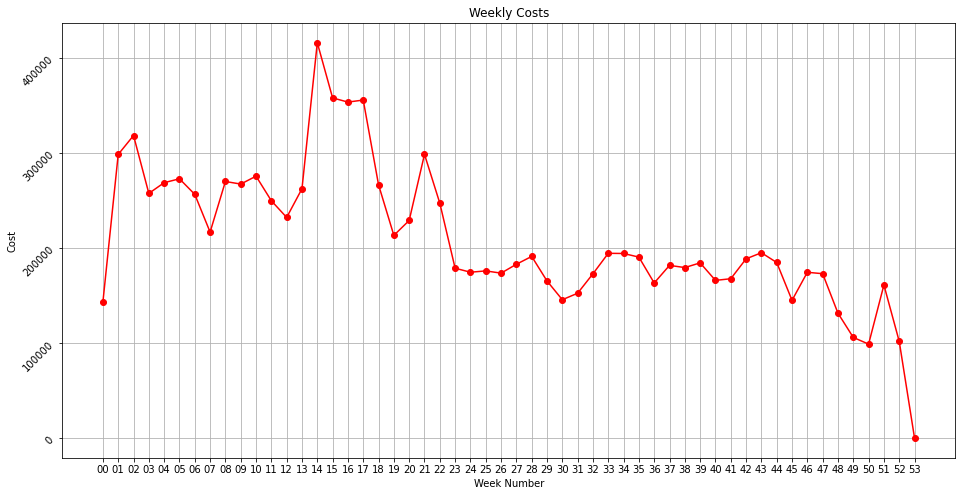

In [14]:
plt.figure(figsize=(16, 8))
# Create a line chart for 'Cost'
plt.plot(raw_df_sum['WeekNumber'], raw_df_sum['Cost'], color='red', marker='o')

# Customize the chart
plt.xlabel('Week Number')
plt.ylabel('Cost')
plt.title('Weekly Costs')

plt.yticks(rotation=45)
# Show the chart
plt.grid(True)
plt.show()

##### Bar Chart for Impressions

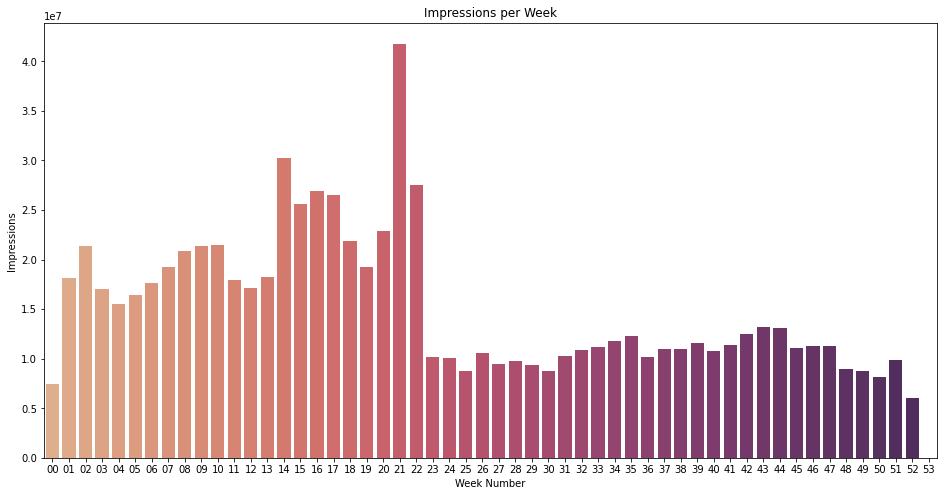

In [20]:
plt.figure(figsize=(16, 8))
#sns.set_palette("flare")

# Create a bar chart for 'Impressions'
sns.barplot(data=raw_df_sum, x='WeekNumber', y='Impressions', palette='flare')

# Customize the chart
plt.xlabel('Week Number')
plt.ylabel('Impressions')
plt.title('Impressions per Week')

# Show the chart
plt.show()

### 8. Ignoring Campaign and Daily Information

In [21]:
raw_df_cleaned

,Date,Campaign,Cost,Impressions,WeekNumber
0,2015-02-04,Branded Broad,8.49,4315,05
1,2015-02-04,Competitors Broad,23.25,5407,05
2,2015-02-04,X_B | UK | Exact,3.60,2203,05
3,2015-02-04,X_LT | UK | Competitors | Exact,5.30,2328,05
4,2015-02-05,Competitors Broad,4.56,3804,05
...,...,...,...,...,...
75836,2019-05-19,Croud_UK_P_Reach-Top-Funnel_Product-Information,24.98,50135,20
75837,2019-05-19,Croud_UK_P_Traffic-Middle-Funnel_Campaigns,301.75,141816,20
75838,2019-05-19,Croud_UK_R_ATC-Lower-Funnel_Always-on,406.28,36488,20
75839,2019-05-19,Croud_UK_R_Conversions-Bottom-Funnel_DPA_Alway...,503.36,35033,20


In [22]:
# Let us drop the campaign column from the table since it is irrelevant for our analysis at the moment
# Drop the "Campaign" column from the DataFrame
raw_df_cleaned_campaign = raw_df_cleaned.drop("Campaign", axis=1)

# We can also drop the daily date information
raw_df_cleaned_campaign_date = raw_df_cleaned_campaign.drop("Date", axis=1)

In [23]:
raw_df_cleaned_campaign_date

,Cost,Impressions,WeekNumber
0,8.49,4315,05
1,23.25,5407,05
2,3.60,2203,05
3,5.30,2328,05
4,4.56,3804,05
...,...,...,...
75836,24.98,50135,20
75837,301.75,141816,20
75838,406.28,36488,20
75839,503.36,35033,20


In [24]:
weekly_data = raw_df_cleaned_campaign_date.groupby('WeekNumber').agg({'Cost': 'sum', 'Impressions': 'sum'})

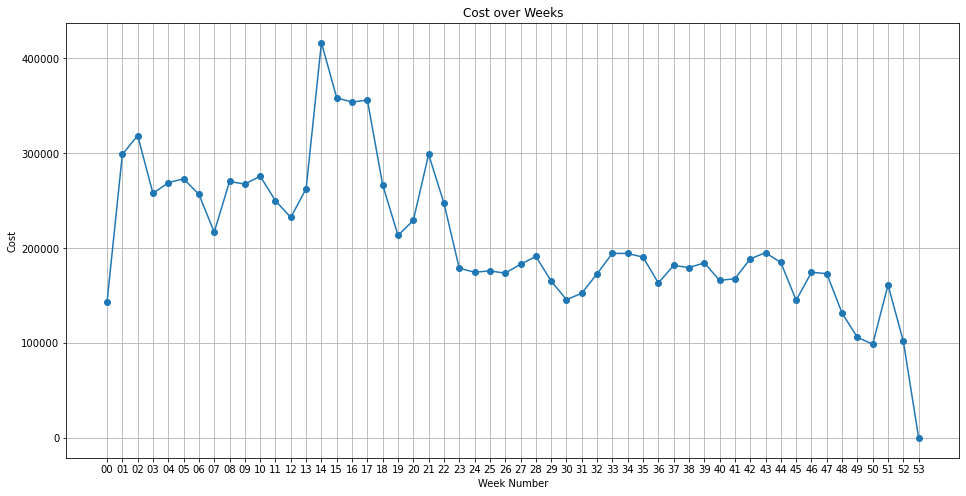

In [29]:
plt.figure(figsize=(16, 8))
plt.plot(weekly_data.index, weekly_data['Cost'], marker='o')
plt.xlabel('Week Number')
plt.ylabel('Cost')
plt.title('Cost over Weeks')
plt.grid(True)
plt.show()

They produce the same plot, without the Campaign and Date column, so it is not correlated.

### 9. Calculating relevant metrics for the entire dataset at a top-line level

In [30]:
# Calculate the sum (from 2015-02-04 till 2019-05-19) and mean of relevant metrics for the entire dataset
total_cost = raw_df_cleaned['Cost'].sum()
total_impressions = raw_df_cleaned['Impressions'].sum()
average_cost = raw_df_cleaned['Cost'].mean()
average_impressions = raw_df_cleaned['Impressions'].mean()

# Print the calculated metrics
print("Total Cost:", total_cost)
print("Total Impressions:", total_impressions)
print("Average Cost:", average_cost)
print("Average Impressions:", average_impressions)

# Store these metrics in variables for inclusion in the presentation deck
metrics = {
    'Total Cost': total_cost,
    'Total Impressions': total_impressions,
    'Average Cost': average_cost,
    'Average Impressions': average_impressions
}

Total Cost: 11335228.98
Total Impressions: 805428895
Average Cost: 149.51366475848545
Average Impressions: 10623.748845859604


### 10. Considering All Metrics at a Top-Line Aggregated Level and Drilling Down

In [31]:
# Join the 'raw_df' and 'campaign_lookup' DataFrames based on the 'Campaign' column
merged_df = raw_df_cleaned.merge(campaign_df_cleaned, on='Campaign')

# Group the merged DataFrame by the 'Channel' column and calculate metrics
channel_group = merged_df.groupby('Channel').agg({'Cost': 'sum', 'Impressions': 'sum'})
print(channel_group)

                Cost  Impressions
Channel                          
Display    365601.04    161966805
Facebook  3235683.38    397456627
PLA        942560.24     56465336
PPC       6869060.13    191284563


In [32]:
merged_df

,Date,Campaign,Cost,Impressions,WeekNumber,Channel,Brand/Generic,Type
0,2015-02-04,Branded Broad,8.49,4315,05,PPC,Brand,Prospecting
1,2015-02-04,Competitors Broad,23.25,5407,05,PPC,Generic,Prospecting
2,2015-02-05,Competitors Broad,4.56,3804,05,PPC,Generic,Prospecting
3,2015-02-04,X_B | UK | Exact,3.60,2203,05,PPC,Brand,Prospecting
4,2015-02-05,X_B | UK | Exact,0.74,496,05,PPC,Brand,Prospecting
...,...,...,...,...,...,...,...,...
77131,2019-05-14,"Post: ""Did you know it's #MentalHealthAwarenes...",103.82,6084,19,Facebook,Generic,Prospecting
77132,2019-05-15,"Post: ""Did you know it's #MentalHealthAwarenes...",19.87,1661,19,Facebook,Generic,Prospecting
77133,2019-05-14,"Instagram post: if we opened a cafe, we suspec...",33.90,13819,19,Facebook,Generic,Prospecting
77134,2019-05-15,"Instagram post: if we opened a cafe, we suspec...",51.03,19071,19,Facebook,Generic,Prospecting


### 11. Slicing the data based on other relevant dimensions

In [33]:
# Group the merged DataFrame by the 'Brand/Generic' column and calculate metrics
b_g_group = merged_df.groupby('Brand/Generic').agg({'Cost': 'sum', 'Impressions': 'sum'})
print(b_g_group)

                     Cost  Impressions
Brand/Generic                         
Brand          3354481.59     28869263
Generic        8058423.20    778304068


In [34]:
# Group the merged DataFrame by the 'Type' column and calculate metrics
type_group = merged_df.groupby('Type').agg({'Cost': 'sum', 'Impressions': 'sum'})
print(type_group)

                   Cost  Impressions
Type                                
Prospecting  9776733.57    618369161
Remarketing  1636171.22    188804170
